A notebook for exploring the results of the script run_all_single_cell_analyses

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pickle
import re

from janelia_core.stats.regression import visualize_coefficient_stats

import numpy as np


In [3]:
%matplotlib notebook

## Parameters go here

In [4]:
rs_file = r'/Users/bishopw/Desktop/debug/rs_0.pkl'

## Load results

In [5]:
with open(rs_file, 'rb') as f:
    rs = pickle.load(f)
rs_ps = rs['ps']
rs = rs['rs']

## Visualize stats 

<IPython.core.display.Javascript object>


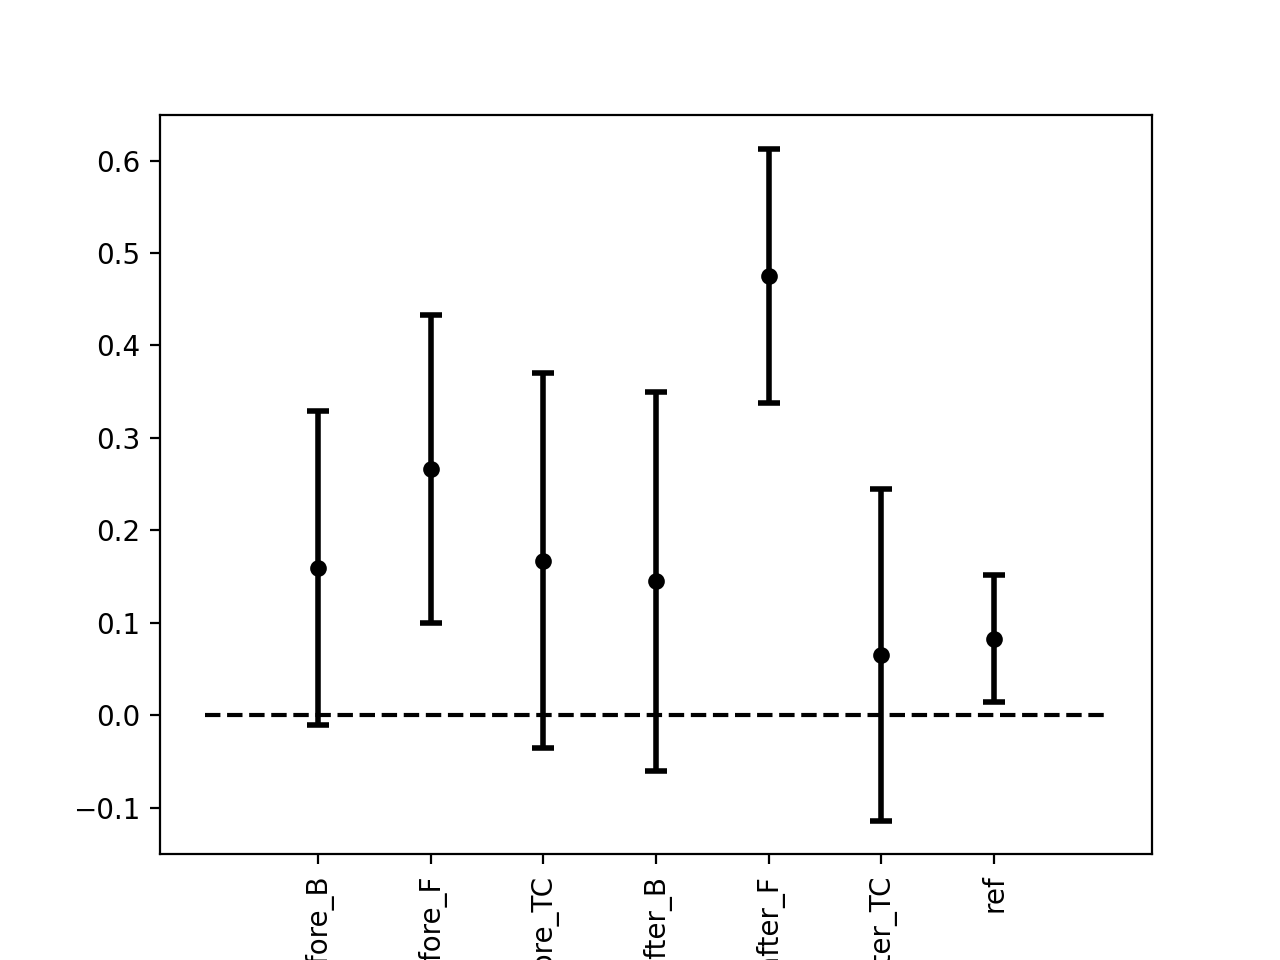

<AxesSubplot:>

In [6]:
visualize_coefficient_stats(var_strs=rs['one_hot_vars_ref'], theta=rs['init_fit']['beta'], 
                            c_ints=rs['init_fit_stats']['c_ints'], x_axis_rot=90)

## Calculate emperical and modeled averages of reference behavior

In [7]:
full_tbl = rs['full_tbl']

In [9]:
ref_ind = np.argwhere(np.asarray(rs['one_hot_vars_ref']) == 'ref')[0][0]
print('Mdl ref conf. int: ' + str(rs['init_fit_stats']['c_ints'][:, ref_ind]))
emp_ref_avg = full_tbl[(full_tbl['beh_before'] == 'Q') & (full_tbl['beh_after'] == 'Q')]['dff'].mean()
print('Emperical avg: ' + str(emp_ref_avg))

Mdl ref conf. int: [0.01414118 0.15125992]
Emperical avg: 0.0784273444075011


## Calculate emperical and modeled averages of non-ref behaviors

In [10]:
before_behs = np.argwhere([re.match('beh_before.*', var) is not None for var in rs['one_hot_vars_ref']]).squeeze()
after_behs = np.argwhere([re.match('beh_after.*', var) is not None for var in rs['one_hot_vars_ref']]).squeeze()

In [27]:
beta = rs['init_fit']['beta']
for before_beh_ind in before_behs:
    before_beh_ref = rs['one_hot_vars_ref'][before_beh_ind]
    before_beh = before_beh_ref[-2:].replace('_', '')
    for after_beh_ind in after_behs:
        after_beh_ref = rs['one_hot_vars_ref'][after_beh_ind]
        after_beh = after_beh_ref[-2:].replace('_', '')
        print('**** Transiton: ' + str(before_beh) + ' -> ' + str(after_beh) + ' **** ')
        
        event_inds = (full_tbl['beh_before'] == before_beh) & (full_tbl['beh_after'] == after_beh)
        if event_inds.sum() > 0:
            mdl_avg = beta[before_beh_ind] + beta[after_beh_ind] + beta[ref_ind]
            emp_avg = full_tbl[event_inds]['dff'].mean()
            print('Mdl avg: ' + str(mdl_avg))
            print('Emperical avg: ' + str(emp_avg))
        else:
            print('Not modeled.')
        

**** Transiton: B -> B **** 
Mdl avg: 0.38677208391279994
Emperical avg: 0.3019295248092276
**** Transiton: B -> F **** 
Mdl avg: 0.7170901615561042
Emperical avg: 0.754641118182709
**** Transiton: B -> TC **** 
Mdl avg: 0.30718972813432355
Emperical avg: 0.384969603919591
**** Transiton: F -> B **** 
Mdl avg: 0.4935720114694002
Emperical avg: 0.7872967992300559
**** Transiton: F -> F **** 
Mdl avg: 0.8238900891127044
Emperical avg: 0.7945103475946913
**** Transiton: F -> TC **** 
Mdl avg: 0.41398965569092394
Emperical avg: 0.31028315464389983
**** Transiton: TC -> B **** 
Mdl avg: 0.39458525377235454
Emperical avg: 0.32276614138311266
**** Transiton: TC -> F **** 
Mdl avg: 0.7249033314156588
Emperical avg: 0.7603610558842635
**** Transiton: TC -> TC **** 
Not modeled.
